# Face Detection Convolutional Neural Network

In [1]:
import pandas as pd
import numpy as np
import keras 
import pickle
import IPython 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Dropout
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model
from sklearn.cross_validation import train_test_split
from IPython.display import display
from glob import glob
from PIL import Image

%matplotlib inline

Using TensorFlow backend.
/Users/aubreybrowne/anaconda/envs/dl/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CMU Image Data Base: Profile Face Image   
Wilma Bainbridge Phd.  
http://users.eecs.northwestern.edu/~xsh835/assets/cvpr2015_cascnn.pdf  
http://web.mit.edu/torralba/www/indoor.html

### Face Database

In [2]:
# 10k faces database
jpgfiles = glob('/Users/aubreybrowne/Documents/dl_final_project/10k_faces_db/face_images/*.jpg')

In [3]:
X1 = []
for file in jpgfiles:
    image = load_img(file, target_size=(56, 56))
    image = img_to_array(image)
    X1.append(image)

In [4]:
X1 = np.array([x for x in X1])

In [5]:
X1.shape

(10168, 56, 56, 3)

In [6]:
#Pictures of Me
myfiles = glob('/Users/aubreybrowne/Documents/dl_final_project/Pictures for DL project/*')

In [7]:
X2 = []
for file in myfiles:
    image = load_img(file, target_size=(56, 56))
    image = img_to_array(image)
    X2.append(image)

In [8]:
X2 = np.array([x for x in X2])

In [12]:
Xface = np.concatenate([X1, X2])

In [13]:
Xface.shape

(10208, 56, 56, 3)

### Backgrounds and Places (Non Face Database)

In [14]:
background = glob('/Users/aubreybrowne/Documents/dl_final_project/background/*')

In [15]:
X3 = []
for file in background:
    image = load_img(file, target_size=(56, 56))
    image = img_to_array(image)
    X3.append(image)

In [16]:
X3 = np.array([x for x in X3])

In [17]:
placesfile = glob('/Users/aubreybrowne/Documents/dl_final_project/Images/*/*')

In [18]:
X5 = []
for file in placesfile:
    image = load_img(file, target_size=(56, 56))
    image = img_to_array(image)
    X5.append(image)

In [19]:
X5 = np.array([x for x in X5])

In [20]:
Xnonface = np.concatenate([X3, X5])

In [21]:
Xnonface.shape

(16520, 56, 56, 3)

In [22]:
Xface.shape

(10208, 56, 56, 3)

### Inputs and Labels

In [23]:
X = np.concatenate([Xface, Xnonface])

In [24]:
X.shape

(26728, 56, 56, 3)

In [25]:
y0 = np.zeros([16520])
y1 = np.ones([10208])
y = np.concatenate((y1, y0))
y

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

### Training the Model

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [27]:
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

In [30]:
# The model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[56, 56, 3]))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(Conv2D(16, (2, 2), activation='sigmoid'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 54, 54, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 16)        2064      
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18434     
Total params: 30,642.0
Trainable params: 30,642.0
Non-trainable params: 0.0
_________________________________________________________________


/Users/aubreybrowne/anaconda/envs/dl/lib/python3.6/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


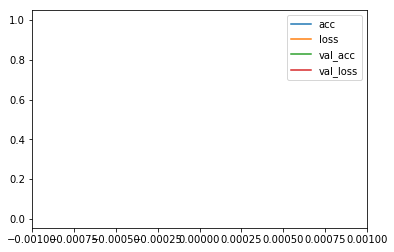

20046/20046 [==============================] - 114s - loss: 0.0525 - acc: 0.9816 - val_loss: 0.0044 - val_acc: 0.9990
Epoch 2/20
 3232/20046 [===>..........................] - ETA: 87s - loss: 0.0016 - acc: 1.0000     

KeyboardInterrupt: 

In [31]:
class TrainingVisualizerCallback(keras.callbacks.History):
    def on_epoch_end(self, epoch, logs={}):
        super().on_epoch_end(epoch, logs)
        IPython.display.clear_output(wait=True)
        pd.DataFrame(self.history).plot()
        plt.show()

model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[TrainingVisualizerCallback()])

>It started overfitting so I stopped it pretty early. 

In [32]:
score = model.evaluate(x_test, 
                       y_test, 
                       verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.00750433769524
Test accuracy: 0.9982041305


In [33]:
model.save('faceDetection.h5')

### Quick Test

In [42]:
test1 = load_img('/Users/aubreybrowne/Documents/dl_final_project/test_pics/Screen Shot 2017-05-07 at 10.21.58 PM.png', target_size=(56, 56))
test1 = img_to_array(image)
test1 = np.array(test1)
test1 = np.reshape(test1, [1, 56, 56, 3])

In [43]:
model.predict(test1)

array([[  9.99989152e-01,   1.08395561e-05]], dtype=float32)